In [232]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules related to this exercise
from educationmodel_3 import EducationModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [233]:
model = EducationModel()

In [234]:
model.par.school_time_grid

array([ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18.,
       19., 20.])

In [235]:
model.par.experience_grid

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17.])

In [236]:
model.sol.V.shape

(11, 6, 15, 18, 5, 5, 5)

In [237]:
model.solve()

In [238]:
sol = model.sol

In [239]:
sol.d.mean()

0.1903564534231201

In [240]:
sol.d[1].mean()

0.19290370370370372

In [243]:
sol.d.shape

(11, 6, 15, 18, 5, 5, 5)

In [242]:
model.simulate()

IndexError: index 15 is out of bounds for axis 2 with size 15

In [ ]:
model.sim.d.shape

(300, 11)

In [ ]:
sim=model.sim

In [ ]:
sim.d.mean(axis=0)

array([0.16666667, 0.16666667, 0.16666667, 0.01028799, 0.00666667,
       0.00666667, 0.00666667, 0.00666517, 0.00319089, 0.        ,
       0.        ])

In [ ]:
model.par.phi1

0.1

In [ ]:
mean_d_vectors =[]
mean_school_time_vectors = []
mean_wage_vectors = []
mean_experience_vectors = []

In [ ]:
start = 0 
for i in range(model.par.Nfix):
    end = start + model.par.block_length
    mean_d = sim.d[start:end].mean(axis=0)
    mean_school_time = sim.school_time[start:end].mean(axis=0)
    mean_wage = sim.wage[start:end].mean(axis=0)
    mean_d_vectors.append(mean_d)
    mean_school_time_vectors.append(mean_school_time)
    mean_wage_vectors.append(mean_wage)
    mean_experience = sim.experience[start:end].mean(axis=0)
    mean_experience_vectors.append(mean_experience)
    start = end 


In [ ]:
plot_vectors = [mean_d_vectors, mean_school_time_vectors, mean_wage_vectors, mean_experience_vectors]
vector_names = ["Mean schooling choice", "Mean school time", "Mean wage", "Mean experience"]

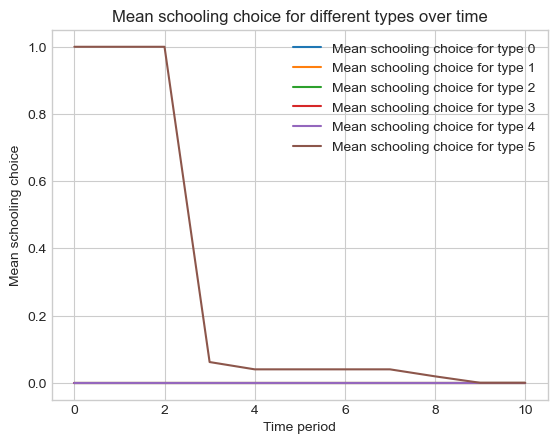

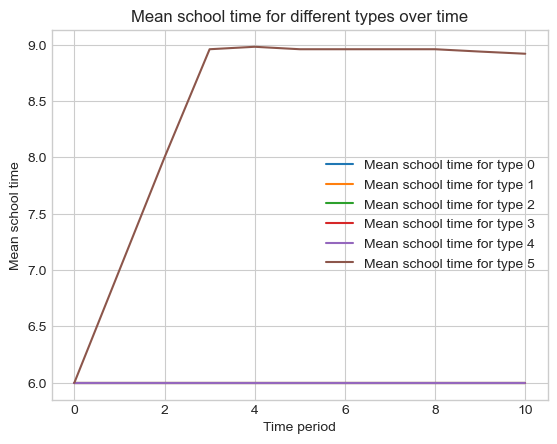

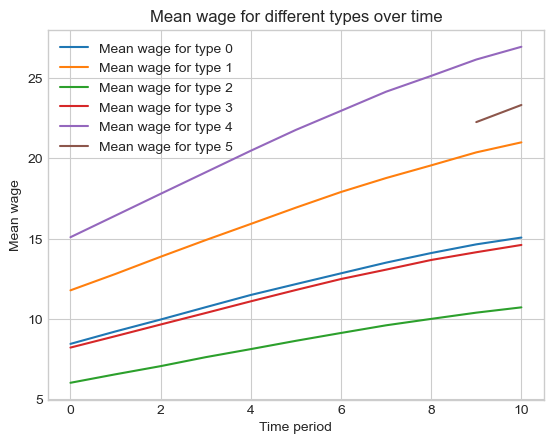

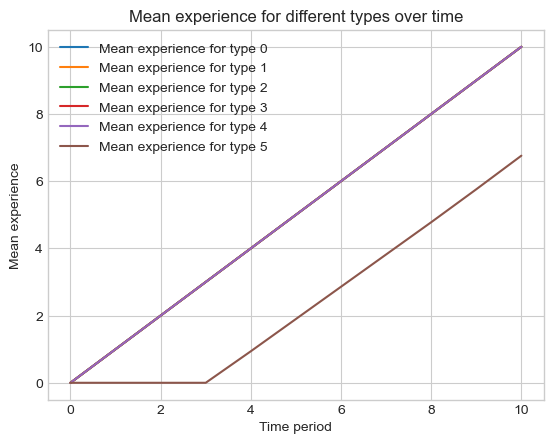

In [ ]:
for vector, name in zip(plot_vectors, vector_names):
    for i in range(model.par.Nfix):
        plt.plot(vector[i], label=f"{name} for type {i}")
    plt.legend()
    plt.xlabel("Time period")
    plt.ylabel(name)
    plt.title(f"{name} for different types over time")
    plt.show()